Pokemon Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Overview Of Pokemon Daataset

In [4]:
df = pd.read_csv('Pokemon.csv')
print(df.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Dataset Cleaning

In [7]:
print(df.isnull().sum())

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [8]:
df['Type 2'] = df['Type 2'].fillna('none')

In [9]:
duplicates_count = df.duplicated().sum()
df = df.drop_duplicates()

In [10]:
df.columns = df.columns.str.replace(' ','_')

In [11]:
cleaned_data_info = {
    'Missing_values': df.isnull().sum(),
    'Duplicates_removes': df.drop_duplicates(),
    'Column_namaes': list(df.columns)
}
cleaned_data_info

{'Missing_values': #             0
 Name          0
 Type_1        0
 Type_2        0
 Total         0
 HP            0
 Attack        0
 Defense       0
 Sp._Atk       0
 Sp._Def       0
 Speed         0
 Generation    0
 Legendary     0
 dtype: int64,
 'Duplicates_removes':        #                   Name   Type_1  Type_2  Total  HP  Attack  Defense  \
 0      1              Bulbasaur    Grass  Poison    318  45      49       49   
 1      2                Ivysaur    Grass  Poison    405  60      62       63   
 2      3               Venusaur    Grass  Poison    525  80      82       83   
 3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
 4      4             Charmander     Fire    none    309  39      52       43   
 ..   ...                    ...      ...     ...    ...  ..     ...      ...   
 795  719                Diancie     Rock   Fairy    600  50     100      150   
 796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      11

In [12]:
df.to_csv('Cleaned_Data_Pokemon.csv')

Exploratory Data Analysis (EDA)

In [13]:
# Reload the dataset
df = pd.read_csv('Cleaned_Data_Pokemon.csv')
df.head()

,Unnamed: 0,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,False


In [14]:
# 1. Distribution of Pokémon by Type_1

type_1_counts = df['Type_1'].value_counts()
print(type_1_counts)

Type_1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


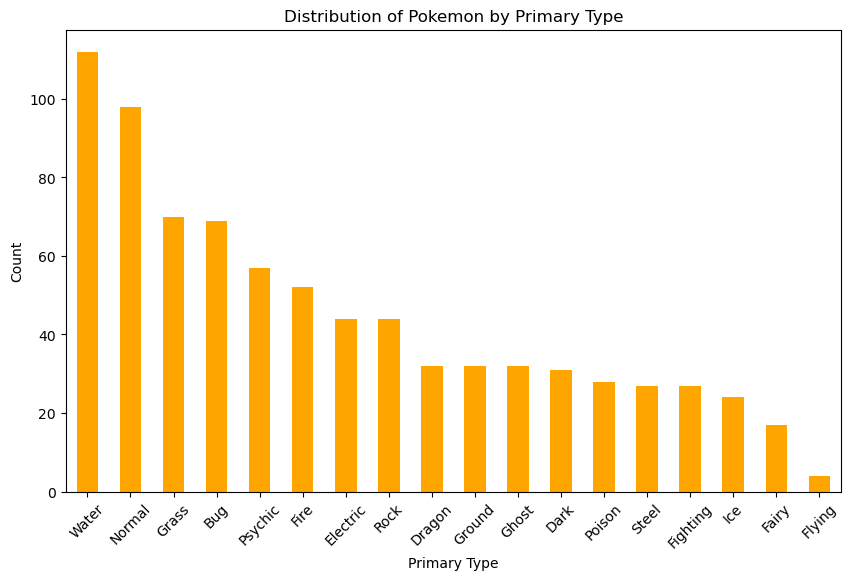

In [15]:
# Plot the distribution of Type_1
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
type_1_counts.plot(kind='bar',color='orange')
plt.title("Distribution of Pokemon by Primary Type")
plt.xlabel("Primary Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [16]:
# 2. Distribution of Pokémon by Generation
generation_counts = df['Generation'].value_counts()
print(generation_counts)

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


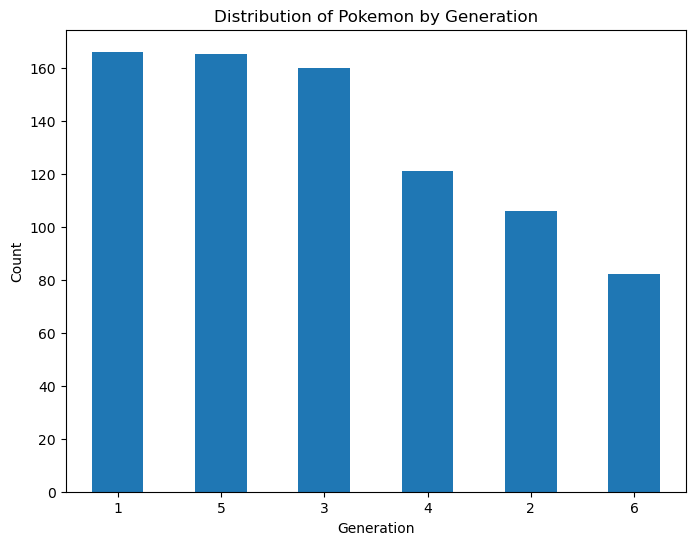

In [30]:
# Plot the distribution of Generation
plt.figure(figsize=(8, 6))
generation_counts.plot(kind='bar')
plt.title("Distribution of Pokemon by Generation")
plt.xlabel("Generation")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

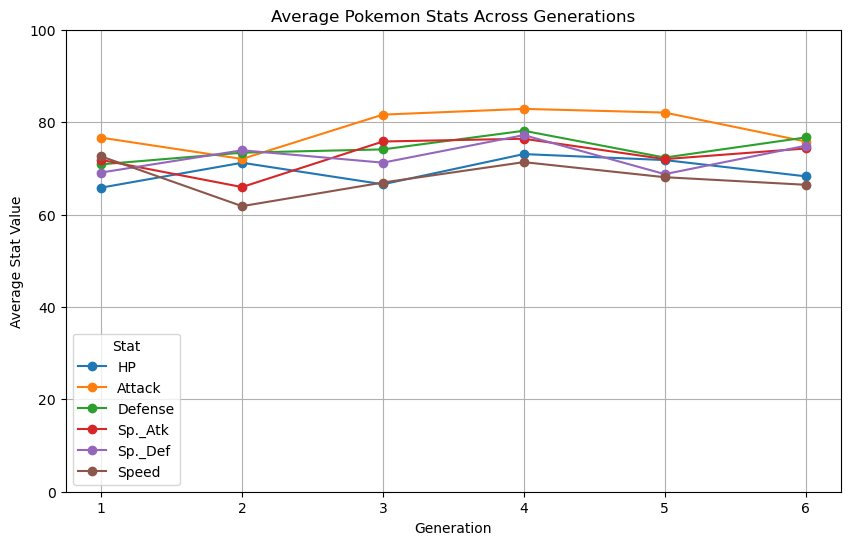

In [32]:
# Ensure that only numeric columns are included in the aggregation
generation_stats = df.groupby('Generation').mean(numeric_only=True)

# Define the Y-axis range with increments of 20
y_min = 0  # Start at 0
y_max = int(generation_stats[['HP', 'Attack', 'Defense', 'Sp._Atk', 'Sp._Def', 'Speed']].max().max() // 20 * 20 + 20)

# Plot trends for key stats across generations (excluding 'Total')
plt.figure(figsize=(10, 6))
generation_stats[['HP', 'Attack', 'Defense', 'Sp._Atk', 'Sp._Def', 'Speed']].plot(
    kind='line', marker='o', figsize=(10, 6))
plt.title("Average Pokemon Stats Across Generations")
plt.xlabel("Generation")
plt.ylabel("Average Stat Value")
plt.grid(True)
plt.legend(title="Stat")
plt.xticks(ticks=generation_stats.index)

# Adjust y-axis ticks with increments of 20
plt.yticks(range(y_min, y_max + 1, 20))

plt.show()


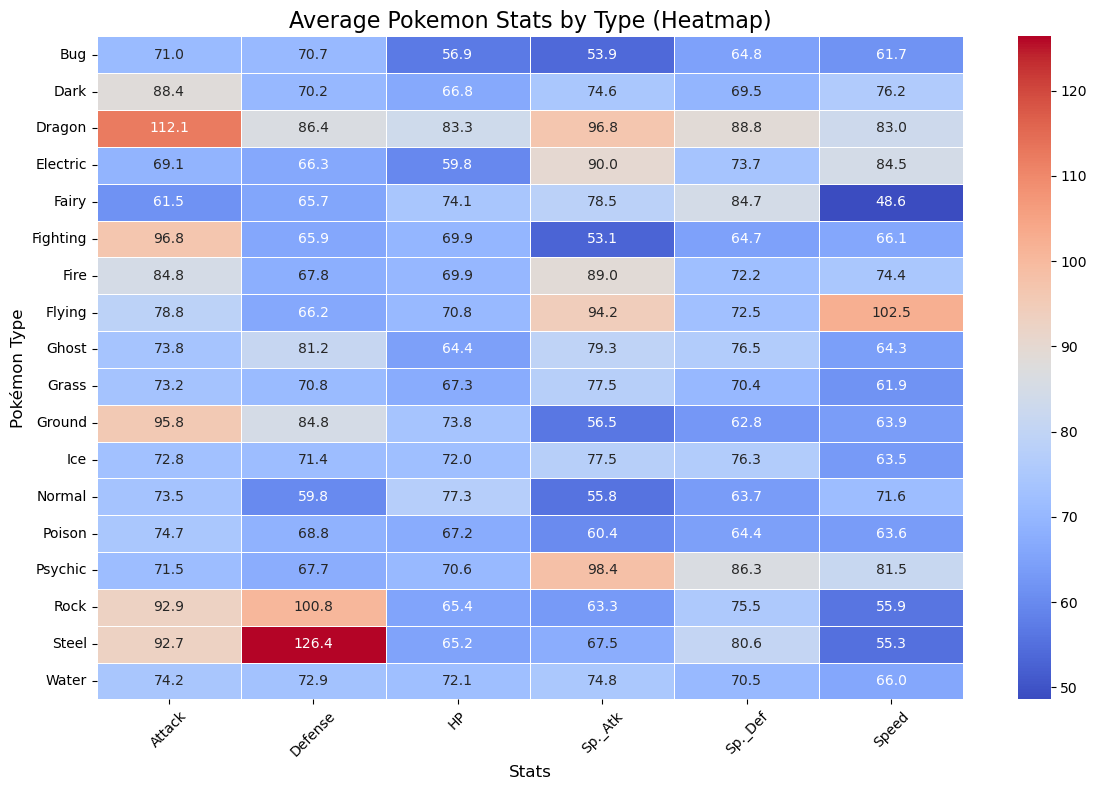

In [35]:
# Create a pivot table to calculate average stats by 'Type 1'
pivot_table = df.pivot_table(
    values=['HP', 'Attack', 'Defense', 'Sp._Atk', 'Sp._Def', 'Speed'],
    index='Type_1',
    aggfunc='mean'
)

# Plotting the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,  # Display the values on the heatmap
    fmt=".1f",   # Format the values to 1 decimal point
    cmap='coolwarm',  # Color palette
    linewidths=0.5    # Add grid lines
)

# Customizing the plot
plt.title('Average Pokemon Stats by Type (Heatmap)', fontsize=16)
plt.xlabel('Stats', fontsize=12)
plt.ylabel('Pokémon Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()


In [36]:
# Check if any Pokémon have Flying in Type 2
flying_pokemon_type2 = df[df['Type_2'] == 'Flying']

# Calculate the average stats for Pokémon with Flying as Type 2
flying_type2_stats = flying_pokemon_type2[['Attack', 'Defense', 'Speed']].mean()

print("Average Stats for Flying (Type 2):")
print(flying_type2_stats)


Average Stats for Flying (Type 2):
Attack     80.288660
Defense    68.309278
Speed      85.721649
dtype: float64


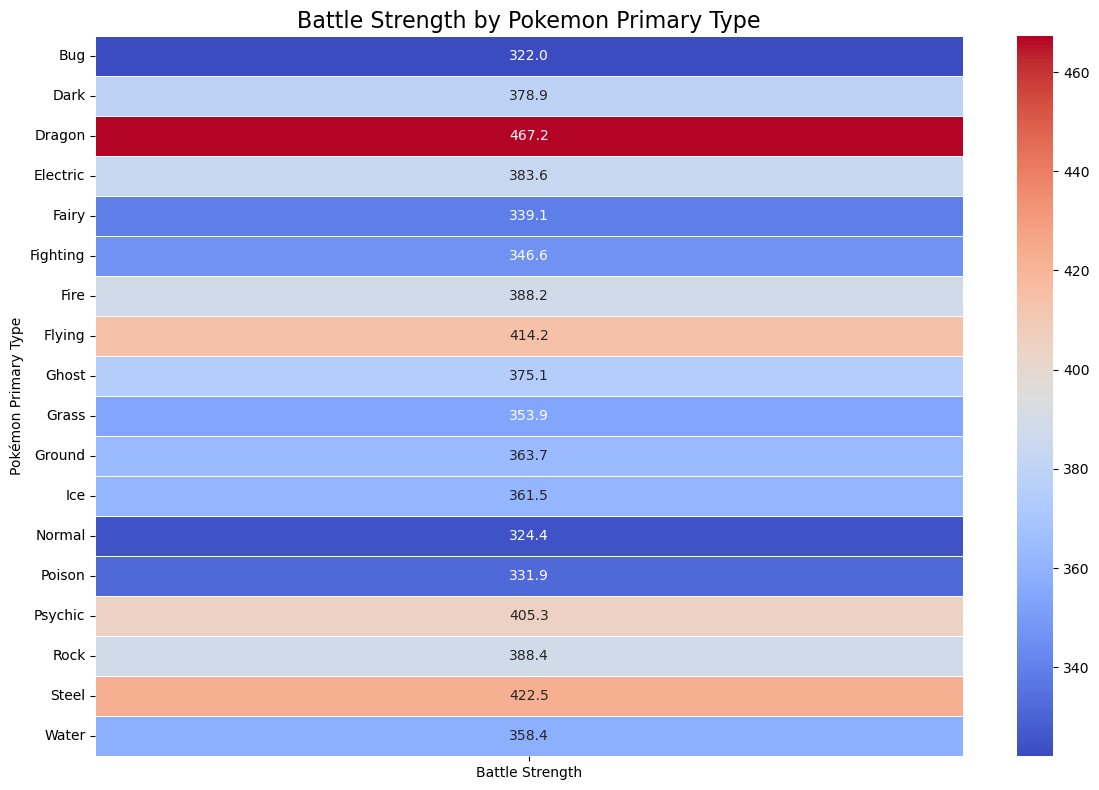

In [37]:
# Calculate the average stats for each Type 1 using the updated formula
type_1_stats = df.groupby('Type_1').mean(numeric_only=True)

# Add Battle Strength calculation using the updated formula
type_1_stats['Battle Strength'] = (
    type_1_stats['Attack'] + type_1_stats['Speed'] + type_1_stats['Defense'] +
    type_1_stats['Sp._Atk'] + type_1_stats['Sp._Def']
)

# Visualize the Battle Strength for each Type 1
plt.figure(figsize=(12, 8))
sns.heatmap(
    type_1_stats[['Battle Strength']],
    annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5
)
plt.title("Battle Strength by Pokemon Primary Type", fontsize=16)

plt.ylabel("Pokémon Primary Type")
plt.tight_layout()
plt.show()


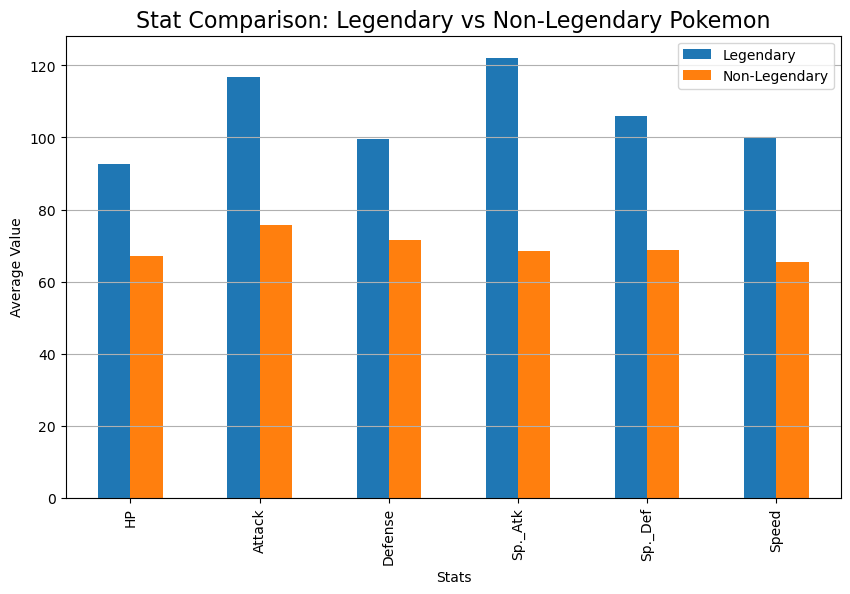

In [38]:
# Separate datasets for Legendary and Non-Legendary Pokémon
legendary_stats = df[df['Legendary'] == True].mean(numeric_only=True)
non_legendary_stats = df[df['Legendary'] == False].mean(numeric_only=True)

# Combine the data for comparison
compare_stats = pd.DataFrame({
    'Legendary': legendary_stats,
    'Non-Legendary': non_legendary_stats
}).loc[['HP', 'Attack', 'Defense', 'Sp._Atk', 'Sp._Def', 'Speed']]

# Bar plot comparison
compare_stats.plot(kind='bar', figsize=(10, 6))
plt.title("Stat Comparison: Legendary vs Non-Legendary Pokemon", fontsize=16)
plt.xlabel("Stats")
plt.ylabel("Average Value")
plt.grid(axis='y')
plt.show()


<Figure size 1200x600 with 0 Axes>

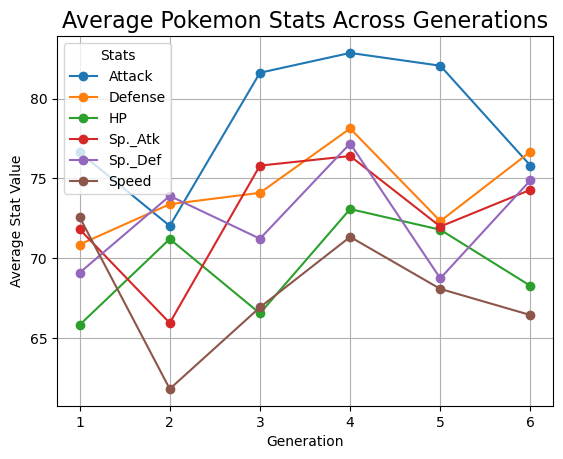

In [39]:
# Calculate average stats by Generation
generation_trends = df.pivot_table(
    values=['HP', 'Attack', 'Defense', 'Sp._Atk', 'Sp._Def', 'Speed'],
    index='Generation',
    aggfunc='mean'
)

# Line plot for trends
plt.figure(figsize=(12, 6))
generation_trends.plot(marker='o')
plt.title("Average Pokemon Stats Across Generations", fontsize=16)
plt.xlabel("Generation")
plt.ylabel("Average Stat Value")
plt.grid()
plt.legend(title="Stats")
plt.show()
